# Homework #1
Due 11:59 pm EST, **Sunday Feb 13th, 2022**
Email your solutions (both .ipnb and .html files) to:
compscbio@gmail.com.

### Goal: Ensure that you ...
- have basic, practical knowledge of Python
- are able to install Python packages
- are able to use and create Jupyter notebooks
- can apply this knowledge to explore one aspect of self-renewal



<hr>

### Preamble: functions
In class, we did not cover the syntax for defining your own functions. Let's cover this now. Note that we use the `randint` function from the random module, and so need to import this module. Typically, you should import all of the modules that you will need at the start of your session. So, I am going to put some other import statements here that we won't need until later in the homework. Please install modules, as needed, using either `pip` or anaconda.

In [2]:
import random
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Here is a funky little function. It just prints a string passed to the function a random number of times between 1 and 10.

In [2]:
def myFirstFunction(arg1):
    """This is just an example; it doesn't do anything useful"""
    times_to_repeat = random.randint(1,10)
    for i in range(0,times_to_repeat):
        print(arg1)
        
    return times_to_repeat


In [3]:
myFirstFunction("howdy")


howdy
howdy
howdy
howdy


4

When you create a function, you need to use the `def` keyword, then supply your function name, followed by the names of arguments that need to be passed to the function enclosed in parenthesis, followed by `:`. Then the following indented suite of code is where you define what the function will do. The first line should be text enclosed in three pairs of double quotes. This is what will be returned when `help(yourFunction)` is invoked. Therefore, give some thought to this text and make it a pithy description of your function. If you do not end the function suite with an explicit call to `return`, the the function will by default return `None`.

<hr>

### Part 1: Write a function `prose_generator`.
The first thing that you must do for this homework is to define a function that writes a number of English sentences. The user will be asked to specify the number of sentences. The function will also need to take in as input lists of nouns and predicates. The function will construct and print out sentences of the pattern: (noun, predicate), by randomly selecting words from the corresponding lists. Below, we get you started with the skeleton of the function. 

To get full credit for Part 1, your answer must include a function that takes as input the number of sentences to create, and lists of user-supplied nouns and predicates. The lists can be entered either by prompting the user, or by specifying a file(s) that contains the words. If the former, define your examples in your notebook. If the latter, inlcude them as supplemental files with your submission. Your function must randomly select from these lists to make sentences that start with the noun and end with the predicate. Finally, your function must output the specified number of sentences.

In [17]:
# Part 1: modify the function skeleton below to meet the conditions stated above

import random

def prose_generator(num_sentences, n_file_loc, p_file_loc):
    """ a function that writes [beautiful] prose """
    # put your code here
    
    with open(n_file_loc) as nf:
        nouns = nf.read()
    nouns = nouns.split(",")

    with open(p_file_loc) as pf:
        predicates = pf.read()
    predicates = predicates.split(",")
    print("")
    
    for x in range(num_sentences):
        rand_noun = random.choice(nouns)
        rand_predicate = random.choice(predicates)
        print(rand_noun.strip()+ " " + rand_predicate.strip())
    
    return


In [18]:
# Part 1: Show us an example of running your function here
prose_generator(12, "nouns.txt", "predicates.txt")




stem cell slept on the bed
animal threw
gold replicates
log was run over
hair slept on the bed
gold threw
honey fell
hair has fun
animal has fun
stem cell slept on the bed
airport slept on the bed
honey has fun


<HR>

### Part 2: Improve your function
Your function probably does not have much error checking so far. And, it is possible that a random sentence will be generated more than once. I don't know about you, but I find it mildly annoying when people say the same thing repeatedly. So, your second task is to modify your function (or create a new one) so that the following conditions are met:

(A) That the nouns are actually nouns.
(B) That at least two valid nouns and two predicates are entered 
(C) That a sentence is printed at most once. In other words, prevent the function from outputing duplicate sentences.

To achieve (A), you can compare the user-supplied nouns against the long list of nouns that we show you how to extract from the NLTK resource below. If the noun supplied does not occur in this list, then your function must at the very least, notify the user. To get full credit for Part 2, your new or modified sentence-generator function must do the same things as in Part 1, plus it must meet the conditions (A-C). 

You will need to install the following resources from nltk (see next code cell). For more information about the NLTK resource: https://www.nltk.org/data.html 

The post that we found useful to get a list of lots of Enlgish nouns: https://stackoverflow.com/questions/17753182/getting-a-large-list-of-nouns-or-adjectives-in-python-with-nltk-or-python-mad


In [21]:
nltk.download('omw-1.4')
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
from nltk.corpus import wordnet as wn

In [23]:
import random

def prose_generator_error_checked(num_sentences, n_file_loc, p_file_loc):
    """ a function that writes [beautiful] prose """

    # pulled in from above cell
    all_nouns = []
    for synset in wn.all_synsets('n'):
        all_nouns.extend(synset.lemma_names())
    
    with open(n_file_loc) as nf:
        nouns = nf.read()
    nouns = nouns.split(",")
    if len(nouns) < 2:
        print("Not enough nouns in file.")
        return
    else:
        valid_nouns = 0
        for noun in nouns:
            noun = noun.strip()
            if valid_nouns >= 2:
                break
            if noun in all_nouns:
                valid_nouns = valid_nouns + 1
        if valid_nouns < 2:
            print("Not enough valid nouns in file.")
            return
    
    with open(p_file_loc) as pf:
        predicates = pf.read()
    predicates = predicates.split(",")
    print("")
    if len(predicates) < 2:
        print("Not enough predicates in file.")
        return
    
    sentence_history = []
    
    while len(sentence_history) < num_sentences:
        sentence = ""
        rand_noun = random.choice(nouns).strip()
        if rand_noun in all_nouns:
            sentence = str(rand_noun)
            rand_predicate = random.choice(predicates)
            sentence = sentence + " " + str(rand_predicate)
            if sentence not in sentence_history:
                print(sentence)
                sentence_history.append(sentence)
            elif sentence in sentence_history:
                print("Repeat sentence, regenerating.")
        else:
            print("Invalid noun, regenerating.")  
    return


#### Repeat sentence and invalid noun check

In [24]:
prose_generator_error_checked(25, "nouns.txt", "predicates.txt")


painting  replicates
lizard  slept on the bed
painting fell
guitar  has fun
lizard  combusted
lizard  has fun
hair  combusted
hair  threw
guitar  took a nap in the sun
actor  took a nap in the sun
painting  deflated
airport  replicates
hamburger  deflated
painting  threw
honey  slept on the bed
Repeat sentence, regenerating.
Invalid noun, regenerating.
Invalid noun, regenerating.
lizard  replicates
airport  has fun
honey  threw
tomato  slept on the bed
tomato  threw
tomato  was run over
Invalid noun, regenerating.
lizard  was run over
hair  was cooking
animal fell
Invalid noun, regenerating.
honey  deflated


#### Invalid noun file check

In [25]:
prose_generator_error_checked(10, 'one noun.txt', 'predicates.txt')

Not enough valid nouns in file.


#### Invalid predicate file check

In [26]:
prose_generator_error_checked(10, 'nouns.txt', 'one predicate.txt')


Not enough predicates in file.


In [27]:
all_nouns = []
for synset in wn.all_synsets('n'):
    all_nouns.extend(synset.lemma_names())
len(all_nouns)

146347

In [28]:
"carrot" in all_nouns

True

In [29]:
"faba-laba" in all_nouns

False

<HR>

### Part 3: Use Pandas (+ Numpy), and Seaborn (+ Matplotlib)

Next week (actually this week), we are going to start using Scanpy to analyze scRNAseq data. The Scanpy package is excellent at making it easy to analyze this type of data. But when you are just getting started, this can almost be *too* easy because it hides a lot of important details. The goal of this section is to expose you to some aspects of cleaning and selecting data, and to some basic visualization functions. This will give you a better idea of what is happening under-the-hood with packages such as Scanpy (or Seurat in R).

In this section, you need to:

- (A) Load a gene expression data set ([expression table](https://compstemcellbio.s3.amazonaws.com/2022/homework/01/hw1_gex_df.csv); [meta-data](https://compstemcellbio.s3.amazonaws.com/2022/homework/01/hw1_gex_sampTab.csv))
- (B) Remove genes that are not expressed above a selected threshold
- (C) Create boxplot of the expression of one of my favorite genes, Pou5f1, across cell/tissue types
- (D) Identify the top 5 genes in terms of mean expression per cell/tissue type & plot a heatmap of these genes (ordered)
- (E) Compute the similarity of samples & plot a heatmap of them (ordered)

To do this somewhat efficiently, you might want to look at the following documentation:

- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- https://seaborn.pydata.org/generated/seaborn.boxplot.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
- https://seaborn.pydata.org/introduction.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

If it sounds like a lot, don't worry it will be fun!


#### 3A: Load the data

Download the expression matrix and meta-data from the links above. Use the Pandas `read_csv()` to load these. This will create a Pandas DataFrame. 

This mouse data comes from one of our papers, where we compiled previously published RNA-Seq data for classification purposes. There are 16 cell/tissue types, each represented by approximately 60 or more individual samples. Later, in Step 3C, you should also load the metadata, which indicates the cell/tissue type for each sample.


In [7]:
# 3A: Enter your code for loading the file hw1_df.csv as a Data Frame and displaying part of it.
mouse_data = pd.read_csv(".\hw1_gex_df.csv")
mouse_data

,Unnamed: 0,Gm4245,Gm28553,Pcdh11x,Mpp5,Gm21961,Cndp1,Fancm,Gm20732,Mir741,...,Tnfrsf8,Olfr651,Fam186b,Gm6455,Agxt,Pou5f1,Nkx2-5,Ptprc,Hnf4a,Pecam1
0,sample_1,0.147629,0.0,0.000000,2.111865,0.022333,0.080255,1.422557,0.027474,0.0,...,0.000000,0.0,0.054212,0.0,0.000000,0.027474,0.0,5.542296,0.027473,3.553855
1,sample_2,0.000000,0.0,0.097222,1.576759,0.092026,0.000000,0.776741,0.000000,0.0,...,0.429022,0.0,0.025192,0.0,0.000000,0.000000,0.0,5.941280,0.000000,2.066980
2,sample_3,0.130551,0.0,0.000000,0.830908,0.002097,0.000000,0.374792,0.000000,0.0,...,0.000000,0.0,0.141058,0.0,0.000000,0.000000,0.0,4.867573,0.003087,3.215040
3,sample_4,0.055605,0.0,0.005671,0.766059,0.003636,0.000000,0.606007,0.000000,0.0,...,0.135851,0.0,0.022492,0.0,0.000000,0.000000,0.0,4.361936,0.000000,2.774697
4,sample_5,0.059316,0.0,0.007381,0.565881,0.013234,0.000000,0.203025,0.002466,0.0,...,0.315742,0.0,0.000000,0.0,0.000000,0.000000,0.0,4.666947,0.004927,2.283596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,sample_2240,0.338880,0.0,0.052662,1.161058,0.008289,0.000000,0.337817,0.005528,0.0,...,0.000000,0.0,0.008280,0.0,2.993981,0.002768,0.0,0.667728,4.065463,0.940854
2240,sample_2241,0.444273,0.0,0.047892,1.020713,0.007842,0.000000,0.429795,0.000000,0.0,...,0.000000,0.0,0.002722,0.0,2.717027,0.000000,0.0,0.421592,4.090254,0.689249
2241,sample_2242,0.381473,0.0,0.048824,1.079871,0.010265,0.000000,0.391007,0.003122,0.0,...,0.000000,0.0,0.003122,0.0,2.651440,0.006235,0.0,0.717469,4.179704,0.815488
2242,sample_2243,0.229207,0.0,0.035038,0.989093,0.019556,0.000000,0.361692,0.000000,0.0,...,0.000000,0.0,0.011994,0.0,2.526887,0.000000,0.0,0.740862,4.343498,1.096610


#### 3B: Filter out genes whose maximum expression < 2
You might consider using the `pd.loc` and `pd.max()` functions

In [82]:
# 3B: Enter your code for removing genes and print out the size of the resulting data frame
mouse_data_minus_sample = mouse_data.iloc[: , 1:]
first_column = mouse_data.iloc[:, :1]
mouse_data_max = (mouse_data_minus_sample.max(numeric_only = True) > 2).values
mouse_filtered =  mouse_data_minus_sample.loc[:,mouse_data_max]
mouse_filtered.insert(0, 'Unnamed: 0', first_column)
mouse_filtered.shape

(2244, 54)

Limit genes to those that have maximum expression > 2

#### 3C: Make a box and whiskers plot of the gene Pou5f1, grouped by cell/tissue type.
To do this you will need to load the meta-data, linked to above. You might want to use the `pd.concat()` and `sns.boxplot()` functions.

In [107]:
# 3C: Show you code for doing what you need to do to ultimatley make the boxplot. 
# And, of course, display the boxplot below, too

meta_data = pd.read_csv("hw1_gex_sampTab.csv")
pou5f1 = mouse_data['Pou5f1']
combo = pd.concat([meta_data, mouse_data['Pou5f1']], axis=1)

<AxesSubplot:xlabel='Pou5f1', ylabel='description1'>

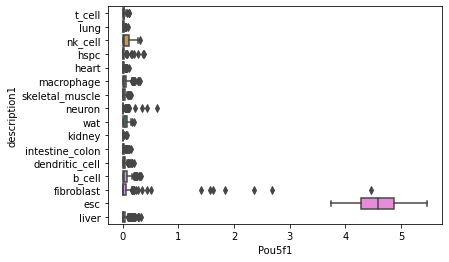

In [108]:
sns.boxplot(x='Pou5f1', y='description1',data=combo)

<AxesSubplot:xlabel='Pou5f1', ylabel='description6'>

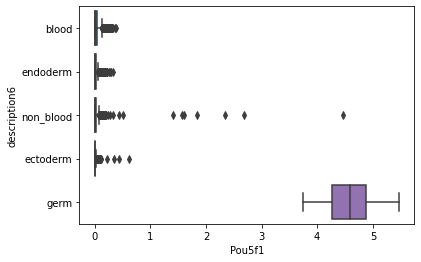

In [109]:
sns.boxplot(x='Pou5f1', y='description6',data=combo)

#### 3D: Determine the top 5 genes expressed per cell/tissue type
Once you have done so, make a heatmap showing expression of these genes across all samples. To get full credit for this, you need to 

- exclude duplicate genes (i.e. genes that are in the top 5 in more than one cell/tissue type)
- order the samples by cell/tissue type

You might want to use the Pandas functions `groupby` and `mean` and `sort_values` here, and it may be useful to do some type conversions. Do use `sns.heatmap()` for plotting.

In [121]:
# 3D: Put your code for this part here.
data_sorted = mouse_data.reindex(mouse_data.mean().sort_values().index, axis=1)
data_sorted

,Gm28553,Gm24298,Mir741,Gm22074,Gm22470,Gm24929,CU467659.2,Gm25860,Mir672,Gm23529,...,Mpp5,Cxcl12,Exoc2,Pecam1,Sort1,Ranbp9,Ptprc,Rfc1,Sep15,Txndc5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.111865,0.178866,2.508055,3.553855,0.295517,2.975416,5.542296,2.020979,2.030830,2.329343
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.576759,0.122711,2.638034,2.066980,0.360264,2.310784,5.941280,1.635519,2.402608,2.375117
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.830908,0.159738,2.210323,3.215040,0.281143,2.178086,4.867573,1.647774,1.969386,2.843742
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.766059,0.440505,1.783912,2.774697,0.618340,1.684460,4.361936,0.985412,1.261368,2.443497
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.565881,0.361973,2.018824,2.283596,0.920374,1.435627,4.666947,0.908954,1.993959,2.481475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.161058,3.785734,0.837668,0.940854,0.810891,1.443834,0.667728,1.214105,2.289347,2.834083
2240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.020713,3.487246,0.856337,0.689249,1.557464,1.510465,0.421592,1.317558,2.350769,2.754201
2241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.079871,3.488185,0.762940,0.815488,1.215627,1.461751,0.717469,1.158748,2.413141,2.910837
2242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.989093,3.384973,0.825084,1.096610,1.470348,1.552735,0.740862,1.195396,2.325185,2.896605


In [127]:
all_data_with_metadata = pd.concat([meta_data, mouse_data], axis=1)
# From https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns - to remove duplicate columns
all_data_with_metadata = all_data_with_metadata.loc[:,~all_data_with_metadata.columns.duplicated()]
all_data_group = all_data_with_metadata.groupby(['description1','description6'])
# From another Stack overflow question
all_data_sorted = all_data_group.apply(lambda x: x.reindex(x.mean().sort_values().index, axis=1))

for group in all_data_group.groups:
        print(group)

('b_cell', 'blood')
('dendritic_cell', 'blood')
('esc', 'germ')
('fibroblast', 'non_blood')
('heart', 'non_blood')
('hspc', 'blood')
('intestine_colon', 'endoderm')
('kidney', 'non_blood')
('liver', 'endoderm')
('lung', 'endoderm')
('macrophage', 'blood')
('neuron', 'ectoderm')
('nk_cell', 'blood')
('skeletal_muscle', 'non_blood')
('t_cell', 'blood')
('wat', 'non_blood')


#### 3E: Compute the similarity between samples.
Compute the Pearson correaltion coefficient between all pairs of samples. Plot this as a heatmap. Make sure the samples are ordered by cell/tissue type. You might want to use the Pandas `corr()` function. Be careful of what your are computing correlation of.


In [ ]:
# 3E: Put you code for 3E here

<hr>

### Part 4: Modeling Birth and death of CFUs
Recall the self-renewal assay from Siminovitch, Till and McCulloch 1963 (right) <img src="/_static/CFUs_selfrenewal.png" width="200" align="right">
In this assay, nodules were dissected, cells were dispersed, resuspended, and tranplanted into secondary recipients. Then after 10 days (or later depending on the experiment), the number of spleen nodules were counted per recipient. Recall that the number of nodules (or colonies) per spleen was highly heterogeneous. To the authors, this indicated that heterogeneity was "... a feature either of colony-forming cells or of the process of colony-formation." 

<img src="/_static/birth_death.png" width="200" align="left"> In a follow-up [paper: Till, McCulloch, and Siminovitch, 1963](https://blackboard.jhu.edu/bbcswebdav/pid-11413450-dt-content-rid-113157130_2/xid-113157130_2), this trio proposed that the heterotengeity could be due to inherent stochasticity in each colony-forming cell. In other words, a colony forming cell "... either give[s] rise to progeny like itself (\"birth\"), or [is] removed in some way (\"death\"), and these two events occur in a random fashion." This is often referred to as a "Birth-and-death process". They reasoned that a cell will give birth to another colony forming cell with Probability = p2 or to a differentiated cells with Probability = p0 (see panel at left). They further reasoned that if this model is correct, then simulations using the model must be aligned with their empircal observations.

The goal of Part 4 is for you to replicate some of what the authors did to test this reasoning:

> A test of this assumption was made by the use of the Monte Carlo method. In this method, the choice between occurrence or nonoccurrence of a random event is made by drawing a number from a table of random digits. Consider as an example the case in which the birth and death probabilities, p2 and p0, are arbitrarily set equal to 0.6 and 0.4, respectively. Let the six digits, 0, 1, 2, 3, 4, and 5 signify a "birth" and the four digits 6, 7, 8, and 9 signify a "death." If the first random number to be drawn was a 5, then the model would show a birth, or an increase from one cell to two cells. Each subsequent choice of a number would determine the fate of a cell in a similar manner.

#### Part 4A: Write a function to simulate the number of colony forming units.
Your task is to precisley mimic what the authors state above: write a function that takes as input:

- the number of time steps, or generations
- P<sub>2</sub> = probability of birth, resulting in two colony forming units 

and that outputs the number of CFUs remaining. Note that a death event results in a loss of one CFU, whereas a birth yields two CFUs. You may consider using the Numpy function `random.uniform()` here.

In [162]:
# 4A: Write your function definition here
def MonteCarloSim(time_steps, p2):
    p0 = 1 - p2
    
    random_events = np.random.uniform(0,10,time_steps)
    
    death = p0 * 10
    
    CFU = 1
    
    history = []
    for event in random_events:
        if event > death:
            CFU = CFU + 1
        if event <= death:
            # I'm assuming the population doesn't go below 0 since it isn't specified
            if CFU > 0:
                CFU = CFU - 1
        history.append(CFU)
        
    print(CFU)
    return history

In [165]:
# 4A: Show us an example of how it works here
MonteCarloSim(6,0.6)

1


[0, 1, 2, 1, 0, 1]

#### Part 4B: Compare *in silico* experiments to empirical data
Use your function to determine how values of P<sub>2</sub> influence the distribution of CFUs, and how this compares to real data.
To do this, you will need to call your function many times. For this homework, let's stay close to the original paper (n=52 recipient spleens).
You will also need the original [data](https://compstemcellbio.s3.amazonaws.com/2022/homework/01/hw1_cfu_data.csv), which you can load with the usual `pd.read_csv()` function.
We recommend testing 3 - 5 values for P<sub>2</sub>. As you will see from the original paper, the simulated and experimentally derived data were compared by examining cumulative distribution functions. You can readily plot these using the Seaborn `ecdfplot()` function.

Bonus points: Compare these distrubitions to the Gamma distribution mentioned in the paper.

1
1
14
38
0


<AxesSubplot:ylabel='Proportion'>

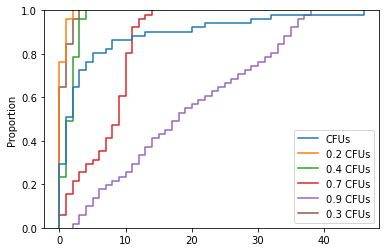

In [178]:
# 4B: Show your code and figure(s) here.
data = pd.read_csv('hw1_cfu_data.csv')
P2_values = [0.2, 0.4, 0.7, 0.9, 0.3]

for value in P2_values:
    col_name = str(value) + " CFUs"
    col_values = MonteCarloSim(51, value)
    data[col_name] = col_values

data_minus_trial = data.drop(labels=['trial'], axis=1)     
sns.ecdfplot(data_minus_trial)